In [5]:
import os
import glob

download_from_allen = False
if download_from_allen:
    from allensdk.api.queries.biophysical_api import BiophysicalApi

    bp = BiophysicalApi()
    bp.cache_stimulus = False
    neuronal_model_id = 484635029    
    bp.cache_data(neuronal_model_id)
    
working_dir = os.getcwd()
json_files = glob.glob(os.path.join(working_dir, "*fit*.json"))
swc_files = glob.glob(os.path.join(working_dir, "*.swc"))
dynamic_params = json_files[0]
morphology = swc_files[0]
print(dynamic_params)
print(morphology)

_ = os.system('nrnivmodl modfiles')

/home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/fit_parameters.json
/home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/reconstruction.swc
/home/gjgpb9/cortex_modeling/bmtool/examples/single_cell
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/CaDynamics.mod
 -> NMODL ../modfiles/Ca_HVA.mod
 -> NMODL ../modfiles/Ca_LVA.mod
 -> NMODL ../modfiles/Ih.mod
 -> NMODL ../modfiles/Im.mod
 -> NMODL ../modfiles/Im_v2.mod
 -> NMODL ../modfiles/Kd.mod
 -> NMODL ../modfil

/home/gjgpb9/miniconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating CaDynamics.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/x86_64/CaDynamics.c
Translating Ca_HVA.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/x86_64/Ca_HVA.c
Translating Ca_LVA.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/x86_64/Ca_LVA.c
Thread Safe
Thread Safe
Thread Safe
Translating Ih.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/x86_64/Ih.c
Thread Safe
Translating Im.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/x86_64/Im.c
Translating Im_v2.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/x86_64/Im_v2.c
Translating Kd.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/x86_64/Kd.c
Thread Safe
Thread Safe
Thread Safe
Translating K_P.

 -> NMODL ../modfiles/SK.mod
 -> Compiling CaDynamics.c
 -> Compiling Ca_HVA.c
 -> Compiling Ca_LVA.c
 -> Compiling Ih.c
 -> Compiling Im.c
 -> Compiling Im_v2.c
 -> Compiling Kd.c
 -> Compiling K_P.c
 -> Compiling K_T.c
 -> Compiling Kv2like.c
 -> Compiling Kv3_1.c
 -> Compiling Nap.c
 -> Compiling NaTa.c
 -> Compiling NaTs.c
 -> Compiling NaV.c
 -> Compiling SK.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special


NEURON mechanisms not found in modfiles.
2024-11-19 09:48:11,634 [WARNING] Can't set erev for apic, section array doesn't exist
Injection location: Biophys1[43].soma[0](0.5)
Recording: Biophys1[43].soma[0](0.5)._ref_v
Current clamp simulation running...

Number of spikes: 39



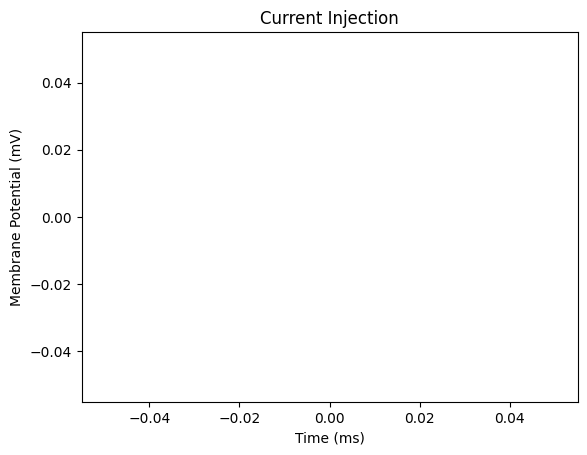

In [7]:
from bmtool.singlecell import CurrentClamp,run_and_plot,Profiler,load_allen_database_cells
import matplotlib.pyplot as plt

cell_creater = load_allen_database_cells(morphology=morphology,
                                 dynamic_params=dynamic_params,
                                 model_processing='aibs_allactive')

profiler = Profiler(template_dir='.', mechanism_dir = 'modfiles', dt=0.1)

sim = CurrentClamp(cell_creater, inj_amp=500., inj_delay=1500., inj_dur=1000., tstop=3000., threshold=-15.)

X, Y = run_and_plot(sim, title='Current Injection', xlabel='Time (ms)',
                    ylabel='Membrane Potential (mV)', plot_injection_only=True)
plt.show()


2024-11-19 09:48:14,537 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,568 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,599 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,629 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,659 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,689 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,720 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,750 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,781 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,812 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,843 [WARNING] Can't set erev for apic, section array doesn't exist
2024-11-19 09:48:14,873 [WARNING] Can't set

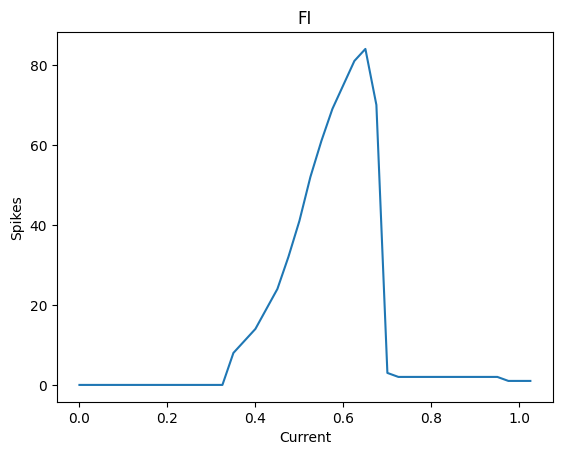

In [8]:
from bmtool.singlecell import FI

sim = FI(cell_creater,tdur=1000,i_increment=25)
X, Y = run_and_plot(sim,xlabel='Current',ylabel="Spikes")
plt.show()